<img src='https://i.imgur.com/I4ake6d.jpg' alt='Logo EU Copernicus WEkEO' align='center' width='100%'></img>


# WEKEO Coastal TRAINING

<div style="text-align: right"><i> INTERMEDIATE LEVEL </i></div>

***
<center><h1> Turbidity due to inondation of Derna in Libya </h1></center>

***
**General Note 1**: Execute each cell through the <button class="btn btn-default btn-xs"><i class="icon-play fa fa-play"></i></button> button from the top MENU (or keyboard shortcut `Shift` + `Enter`).<br>
<br>
**General Note 2**: If, for any reason, the kernel is not working anymore, in the top MENU, click on the <button class="btn btn-default btn-xs"><i class="fa fa-repeat icon-repeat"></i></button> button. Then, in the top MENU, click on "Run" and select "Run All Above Selected Cell".<br>


***

# Table of contents
- [1. Introduction](#1.-Introduction)
- [2. Setting up the R environment](#2.-Setting-up-the-R-environment)
- [3. Data Access](#3.-Data-Access)
- [4. Input](#4.-Input)
- [5. Plot](#5.-Plot)
    - [5.1. Basic Plot](#5.1.-Basic-Plot)
    - [5.2. Comparison between different date](#5.2.-Comparison-between-different-date)
- [6. Use of Sentinel 2 data](#6.-Use-of-Sentinel-2-data)
- [7. Conclusion](#7.-Conclusion)


# 1. Introduction

[Go back to the "Table of contents"](#Table-of-contents)


This training focuses on studying the effect of Storm Daniel near Derna city in Libya (September 2023). The storm caused two dams upstream of Derna to burst, releasing massive torrents of water that overwhelmed the Wadi Derna riverbed and inundated much of the city. This disaster impacted not only the human population but also the fragile coastal and marine ecosystems of Derna, which may take years to recover.

- Sediment and Debris Displacement: the force of the floodwater scoured the landscape, picking up vast amounts of soil, sand, and debris. When these were washed downstream into the Mediterranean Sea, they altered the natural sediment balance of the coastal environment.The influx of sediment disrupted seafloor habitats where various marine organisms live, including fish nurseries and coral communities, smothering them and blocking sunlight. High levels of turbidity and pollutants in the water reduce light penetration, impacting photosynthetic organisms, including marine algae, seagrass, and phytoplankton.

- Pollution of Coastal Waters: the floods swept through industrial and residential areas, carrying with them oil, chemicals, and waste. Toxins in the water can be harmful or fatal to fish, sea turtles, and other marine animals. Contaminants, particularly heavy metals and chemicals, may bioaccumulate in marine life, affecting the entire food chain.

The September 2023 flooding of Derna has far-reaching consequences beyond human and infrastructure losses. The coastal ecosystem has sustained significant damage, which can disrupt biodiversity, reduce marine productivity, and harm the local economy. 

This training will allow you to see the impact of the inondation on turbidity around Derna. We will use an observation product and images of sentinel 2.


# 2. Setting up the R environment
[Go back to the "Table of contents"](#Table-of-contents)

The Jupyter Notebook must be set up with all the necessary available tools from the Jupyter Notebook ecosystem. Here is the list of the modules we will be using in this exercise.

| Module name | Description |
| :---: | :---|
| **RNetCDF** | [RNetCDF](https://www.rdocumentation.org/packages/RNetCDF/versions/2.9-2/topics/RNetCDF) is an interface for the 'NetCDF' file formats. |
| **ggplot2** |[ggplot2](https://ggplot2.tidyverse.org/) is a system for declaratively creating graphics. |
| **dplyr** |[dplyr](https://dplyr.tidyverse.org/) is a library for manipulating data. |
| **RColorBrewer** |[RColorBrewer](https://cran.r-project.org/web/packages/RColorBrewer/index.html) is a library for color palettes in plot. |
| **ncdf4** |[ncdf4](https://cran.r-project.org/web/packages/ncdf4/index.html) is an interface for the 'NetCDF' file formats. |
| **gridExtra** |[gridExtra](https://cran.r-project.org/web/packages/gridExtra/index.html) is a library for arranging multiple grid-based plots on a page. |
| **lubridate** |[lubridate](https://www.rdocumentation.org/packages/lubridate/versions/1.9.3) is a library for fast and user-friendly analysis of date-time data. |
|**raster**|[raster](https://www.rdocumentation.org/packages/raster/versions/3.6-30/topics/raster) is a package for reading, writing, manipulating, analyzing and modeling of spatial data. |

In [ ]:
# Modules system
# for ignoring Warning message
options(warn = -1) 

## Load Packages
library(RNetCDF)        # An interface of the 'NetCDF' file formats
library(ggplot2)        # System to creating graphycs
library(dplyr)          # Operators for data manipulation
library(RColorBrewer)   # For color palettes
library(ncdf4)          # High-level interface to netCDF data files
library(gridExtra)      # To arrange multiple grid-based plots on a page
library(lubridate)      # Fast and user friendly parsing of date-time data
library(raster)         # Toolkit for image processing

If the required R libraries are not installed, you can use the following command to install them:

<center><h4> install.packages(c("RNetCDF", "ggplot2", "dplyr", "raster", "RColorBrewer", "ncdf4", "gridExtra", "lubridate")) </h4></center>

# 3. Data Access

[Go back to the "Table of contents"](#Table-of-contents)


From the [WEKEO data](https://www.wekeo.eu/data), you can explore all the products available with many filters to select the region you are interested in, the parameters you want to study, etc.

WEkEO is a European platform providing access to environmental data, developed by the European Union in partnership with agencies like ESA (European Space Agency), EUMETSAT, and Mercator Ocean. It provides access to a wide range of Earth observation data.

For this training, we will use the following data:

* **Full Name**: CMEMS HR-OC Mediterranean Sea transparency (spm, tur) and geophysical (chl) daily interpolated observations mosaic
* **ProductID**:OCEANCOLOUR_MED_BGC_HR_L4_NRT_009_211
* **Spatial region**: Artic Ocean from Lat=(32.5ºN, 33.2ºN), Lon=(21.5ºE,23.5ºE)
* **Depth**: Surface  
* **Variables**: pH,CHL, ZOOC, PHYC, NO3, O2, spCO2
* **Time period**: Dayly means from 2023-09-07 to 2023-09-22

 and: 
* **Full Name**: SENTINEL-2
* **Time period**: Image on 2023-09-07, 2023-09-12 and 2023-09-17

**You don't have to download it**, the files are already downloading in this training.

__Optional:__ Go to the `Data store` and try to download this data selection. Note: You'll need to have your own WEKEO credentials -- username and password. Creating an account is free of charge and available [here](https://www.wekeo.eu/register).

# 4. Input
[Go back to the "Table of contents"](#Table-of-contents)


In [2]:
# Set the path for the NetCDF files
file <- "data/observation_data.nc"

In [3]:
# Load NetCDF File
data <- nc_open(file)

# Print all information in the Netcdf File
print(data)

In [4]:
# Access Data
latitude <- ncvar_get(data, "latitude")  # Name of the latitude variable
longitude <- ncvar_get(data, "longitude")  # Name of the longitude variable
time <- ncvar_get(data, "time")  # Name of the time variable

spm <- ncvar_get(data, "SPM")     # Suspended Particulate Matter
turbidity <- ncvar_get(data, "TUR")       # sea water turbidity


In [5]:
# visualisation of variable
print(dim(turbidity)) # know the dimension of the variable
print (turbidity[150,500,2]) # know the value depending on longitude, latitude and time

[1] 1512  756   18
[1] 0.1338009


In [6]:
# visualisation of variable time
print (time[1]) # know the value of the first time

[1] 1693526400


In [7]:
# Variable time is the number of seconds since 1970-01-01 00:00:00, we should convert:
time_values <- as.POSIXct(time, origin = "1970-01-01", tz = "GMT")
time_values

 [1] "2023-09-01 GMT" "2023-09-02 GMT" "2023-09-03 GMT" "2023-09-04 GMT"
 [5] "2023-09-05 GMT" "2023-09-06 GMT" "2023-09-07 GMT" "2023-09-08 GMT"
 [9] "2023-09-09 GMT" "2023-09-10 GMT" "2023-09-11 GMT" "2023-09-12 GMT"
[13] "2023-09-13 GMT" "2023-09-14 GMT" "2023-09-15 GMT" "2023-09-16 GMT"
[17] "2023-09-17 GMT" "2023-09-18 GMT"

# 5. Plot

[Go back to the "Table of contents"](#Table-of-contents)
    
## 5.1. Basic Plot
[Go back to the "Table of contents"](#Table-of-contents)

In [8]:
# Determine figure size
options(repr.plot.width =12, repr.plot.height = 6) 

In [9]:
# we create a dataframe
df <- data.frame(expand.grid(longitude, latitude), turbidity = as.vector(turbidity[,,7]))
names(df) <- c("Longitude", "Latitude", "turbidity")

In [10]:
print(object.size(df), units = "auto")

26.2 Mb


In [11]:
nrow(df)

[1] 1143072

In [12]:
df_clean <- na.omit(df)

In [13]:
nrow(df)

[1] 1143072

In [14]:
# visualisation of the dataframe
df[1:20,]

Longitude Latitude turbidity
1  21.50066  32.50046 NaN      
2  21.50198  32.50046 NaN      
3  21.50331  32.50046 NaN      
4  21.50463  32.50046 NaN      
5  21.50595  32.50046 NaN      
6  21.50727  32.50046 NaN      
7  21.50860  32.50046 NaN      
8  21.50992  32.50046 NaN      
9  21.51124  32.50046 NaN      
10 21.51257  32.50046 NaN      
11 21.51389  32.50046 NaN      
12 21.51521  32.50046 NaN      
13 21.51653  32.50046 NaN      
14 21.51786  32.50046 NaN      
15 21.51918  32.50046 NaN      
16 21.52050  32.50046 NaN      
17 21.52183  32.50046 NaN      
18 21.52315  32.50046 NaN      
19 21.52447  32.50046 NaN      
20 21.52579  32.50046 NaN

In [15]:
# Plotting
p <- ggplot() +

# Add turbidity data 
geom_tile(data = df, aes(x=Longitude, y=Latitude, fill = turbidity)) +

# Color scale options limits = c()
scale_fill_gradientn(colors = brewer.pal(9, "OrRd"),  name="turbidity",limits = c(0,3), na.value = "grey") +

# General aesthetic options
theme_light() +

# Title and subtitle
labs(title = paste("turbidity - ",time_values[7],sep=''),
     x = "Longitude",
     y = "Latitude")+

# Legend position and aesthetic options
theme_minimal()+

theme(
    axis.text.x = element_text(size = 20),  # Increase the size of the x-axis values
    axis.text.y = element_text(size = 20),  # Increase the size of the y-axis values
    plot.title = element_text(hjust = 0.5, size = 20),  # Center and increase the size of the title
    axis.title.x = element_text(size = 20),  # Increase the size of the x-axis title
    axis.title.y = element_text(size = 20),  # Increase the size of the y-axis title
    legend.text = element_text(size = 20),    # Increase the size of the legend text
    legend.title = element_text(size = 20)     # Increase the size of the legend title
)   
#p
# to save the figure
ggsave("./figures/basic_figure.png", plot = p, width = 12, height = 6, dpi = 300)


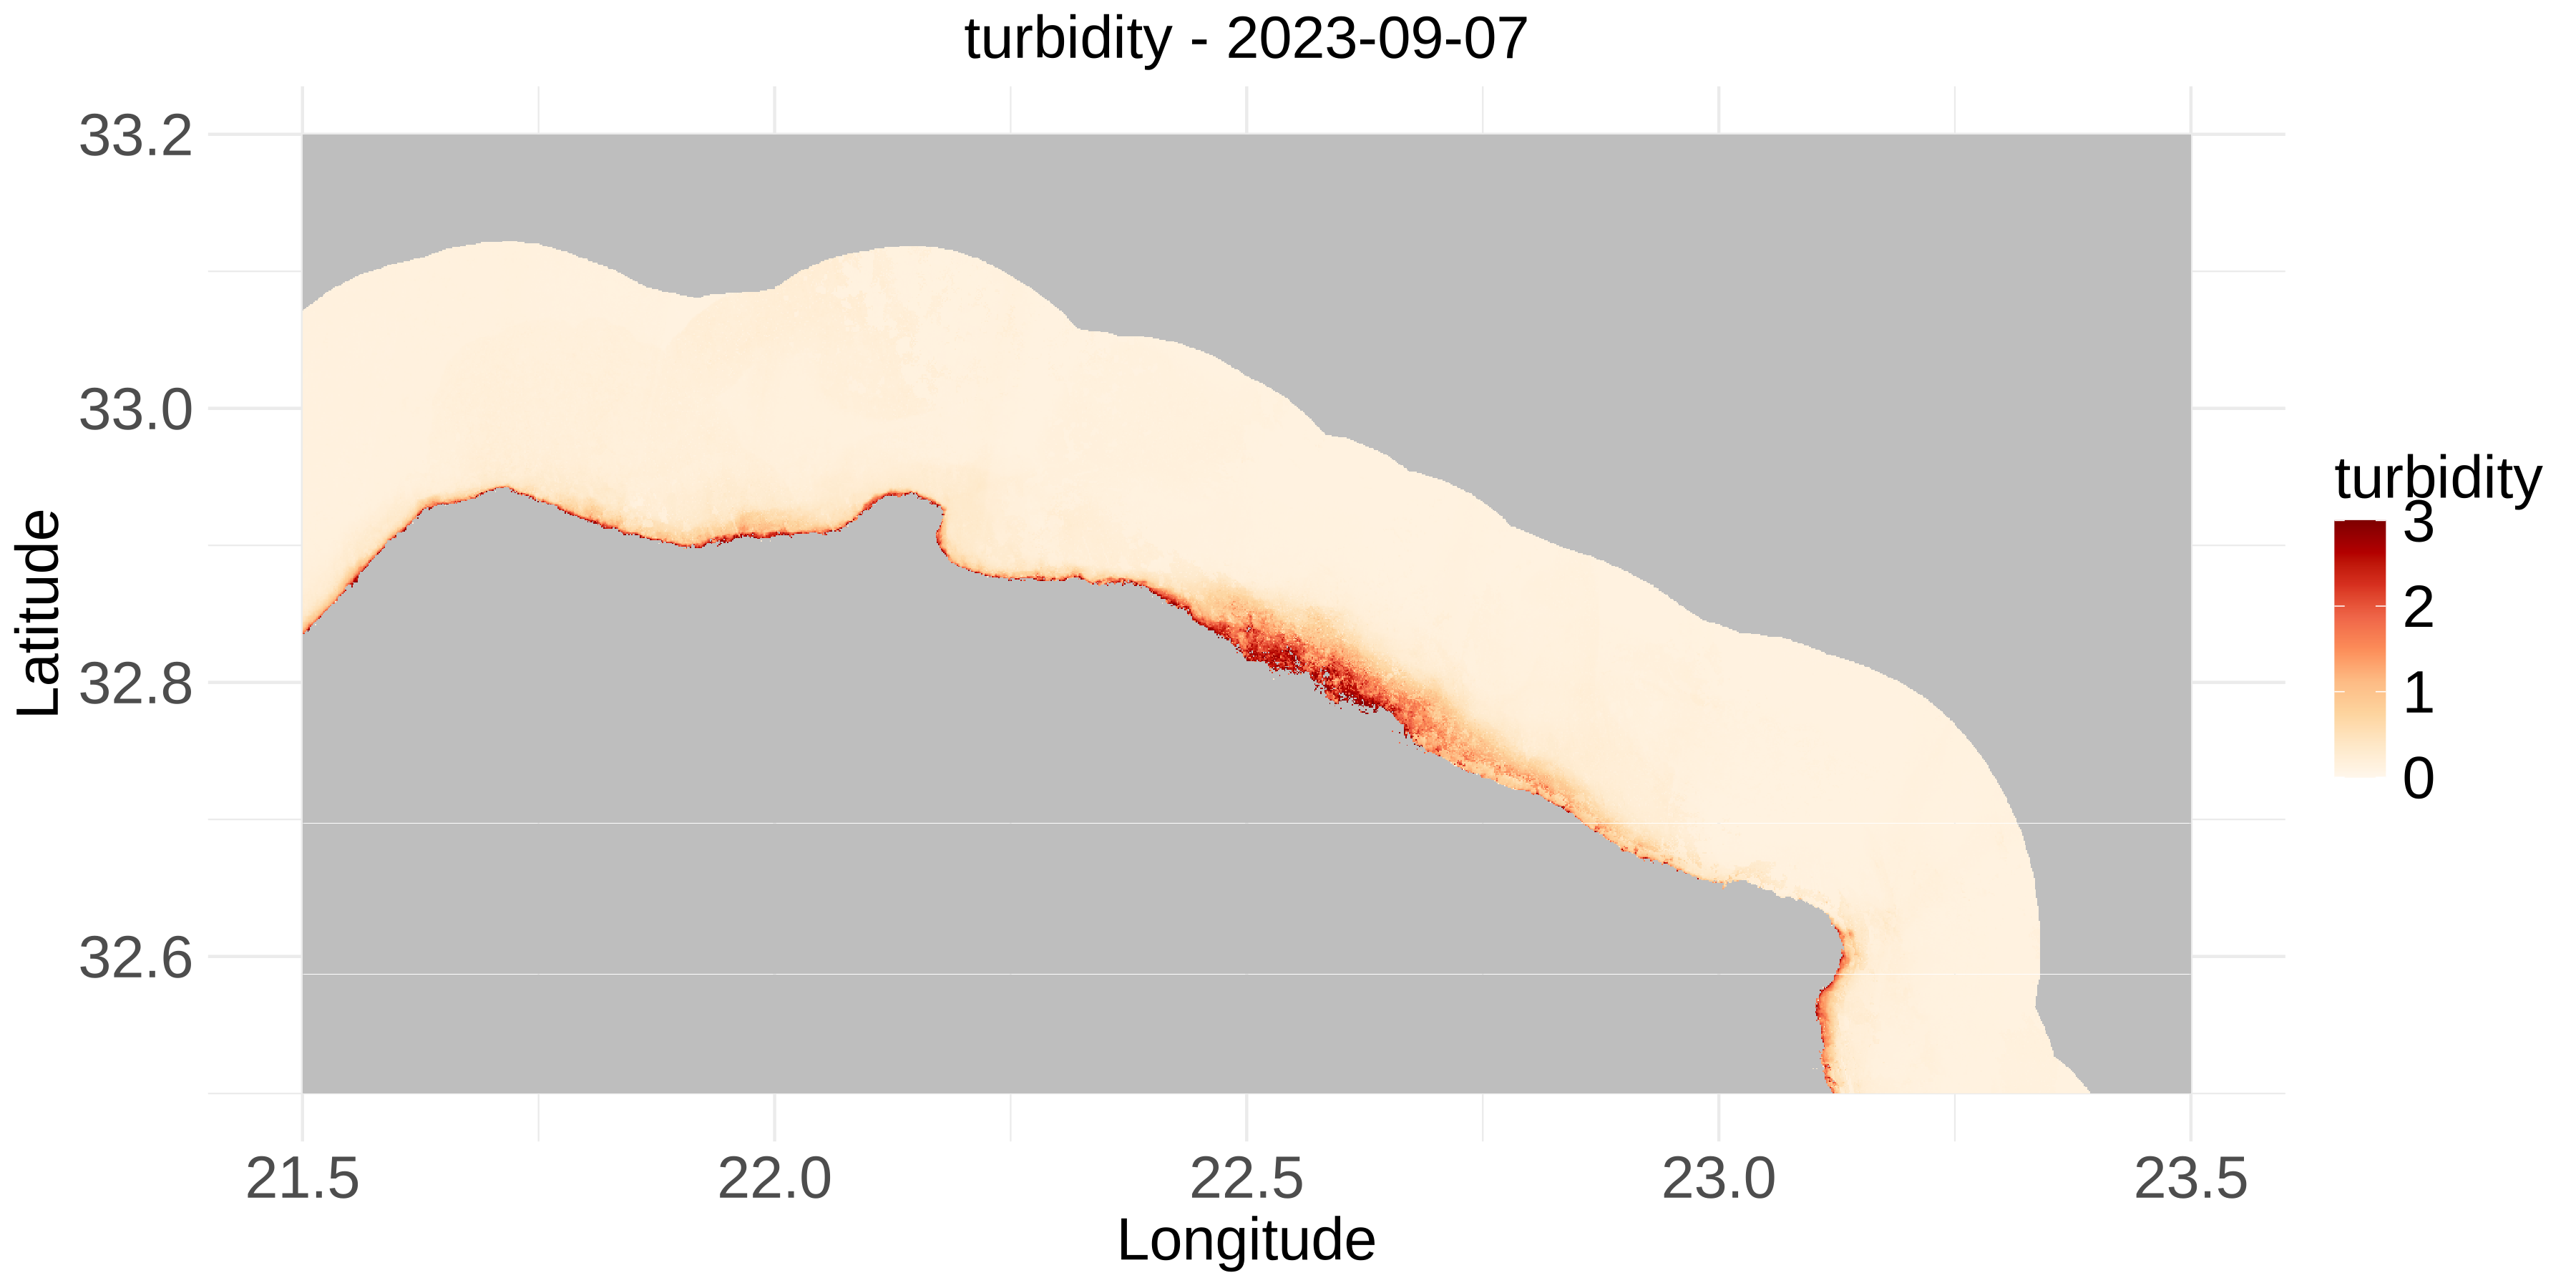

In [16]:
IRdisplay::display_png(file = "./figures/basic_figure.png")

## 5.2. Comparison between different date
[Go back to the "Table of contents"](#Table-of-contents)
    
For this part we will compare three different times with each other:
- September 7: berore the storm
- September 12: just after the storm
- September 17: few days after the storm

We will first create a plot function to simplify the code. Then we will compare the different time with each other

In [17]:
# création of plot function
mapping <- function(longitude,latitude,var,var_name,minmax,date){
    options(repr.plot.width = 12, repr.plot.height = 6) 

    df <- data.frame(expand.grid(longitude, latitude), var = as.vector(var))
    names(df) <- c("Longitude", "Latitude", "var")
    p <- ggplot() +geom_tile(data = df, aes(x=Longitude, y=Latitude, fill = var)) +

    # Color scale options
    scale_fill_gradientn(colors = brewer.pal(20, "OrRd"),  name=var_name,  na.value = "grey",limits = minmax) +

    # General aesthetic options
    theme_light() +

    # Title and subtitle
    labs(title = paste(var_name, " - ",date,sep=''),
         x = "Longitude",
         y = "Latitude")+

    # Legend position and aesthetic options
    theme_minimal()+

    theme(
        axis.text.x = element_text(size = 20),  # Increase the size of the x-axis values
        axis.text.y = element_text(size = 20),  # Increase the size of the y-axis values
        plot.title = element_text(hjust = 0.5, size = 20),  # Center and increase the size of the title
        axis.title.x = element_text(size = 20),  # Increase the size of the x-axis title
        axis.title.y = element_text(size = 20),  # Increase the size of the y-axis title
        legend.text = element_text(size = 20),    # Increase the size of the legend text
        legend.title = element_text(size = 20)     # Increase the size of the legend title
    ) 
 
}

We will plot the turbidity for the three dates:

In [18]:
p1<-mapping (longitude,latitude,turbidity[,,7],'Turbidity',c(0,4),time_values[7])
ggsave("./figures/Turbidity_date1.png", plot = p1 ,width =12, height = 6,  dpi = 300)

In [19]:
p2<-mapping (longitude,latitude,turbidity[,,12],'Turbidity',c(0,4),time_values[12])
ggsave("./figures/Turbidity_date2.png", plot = p2 ,width =12, height = 6,  dpi = 300)

In [20]:
p3<-mapping (longitude,latitude,turbidity[,,17],'Turbidity',c(0,4),time_values[17])
ggsave("./figures/Turbidity_date3.png", plot = p3 ,width =12, height = 6,  dpi = 300)

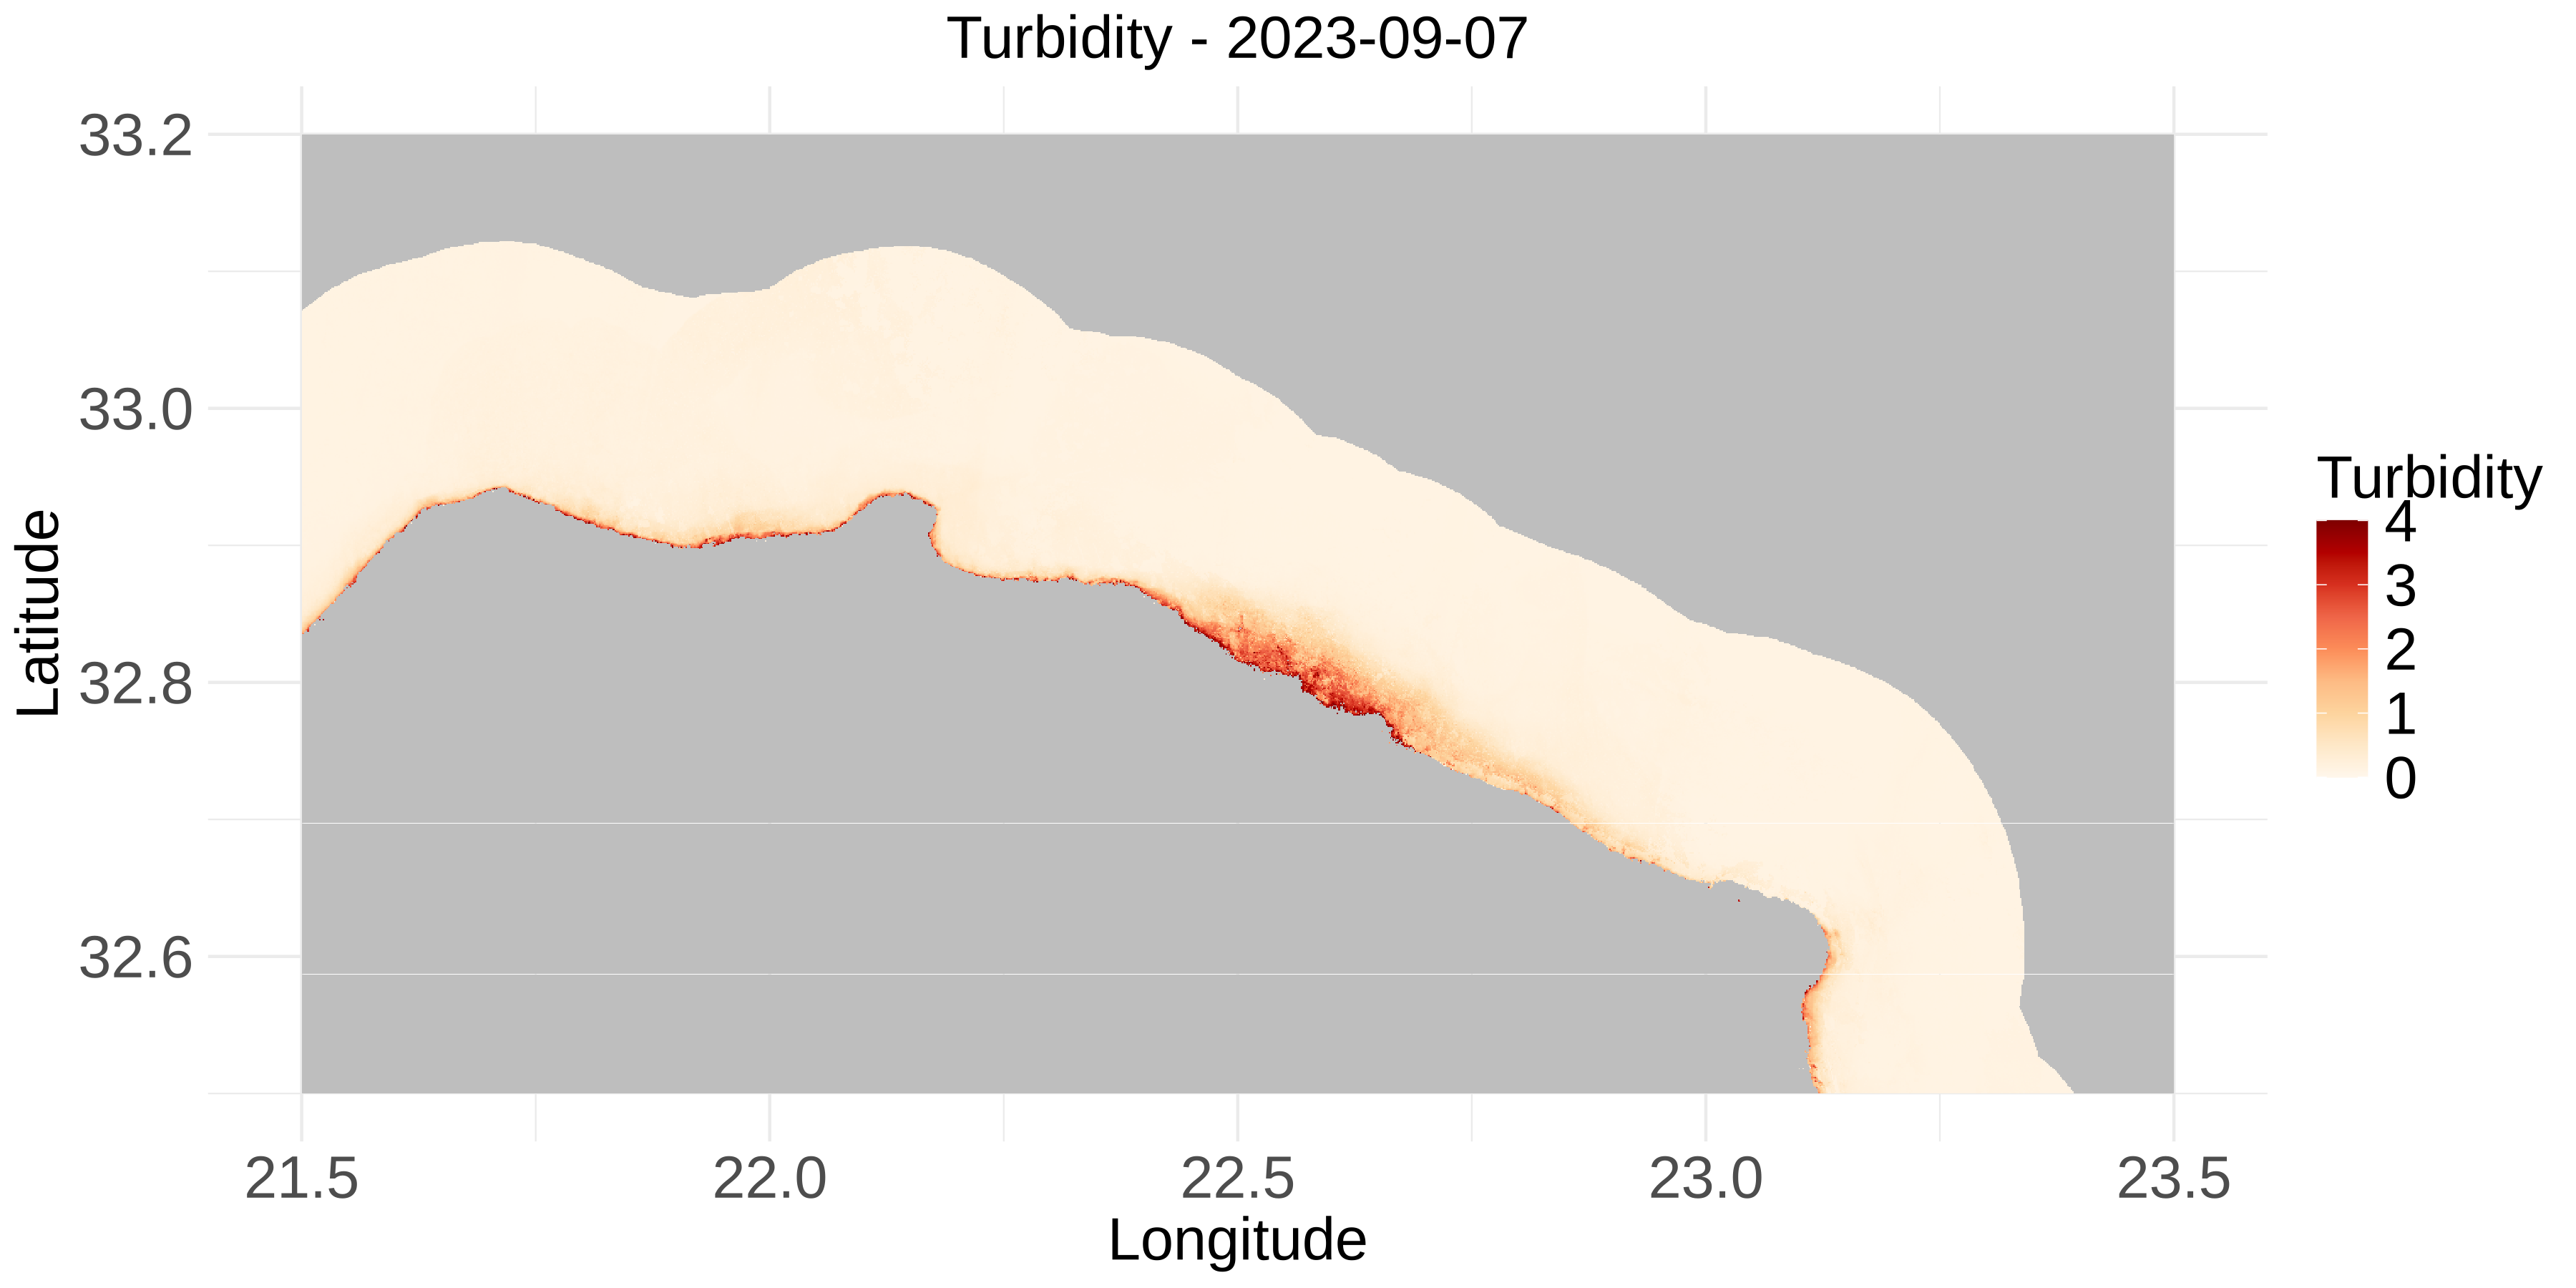

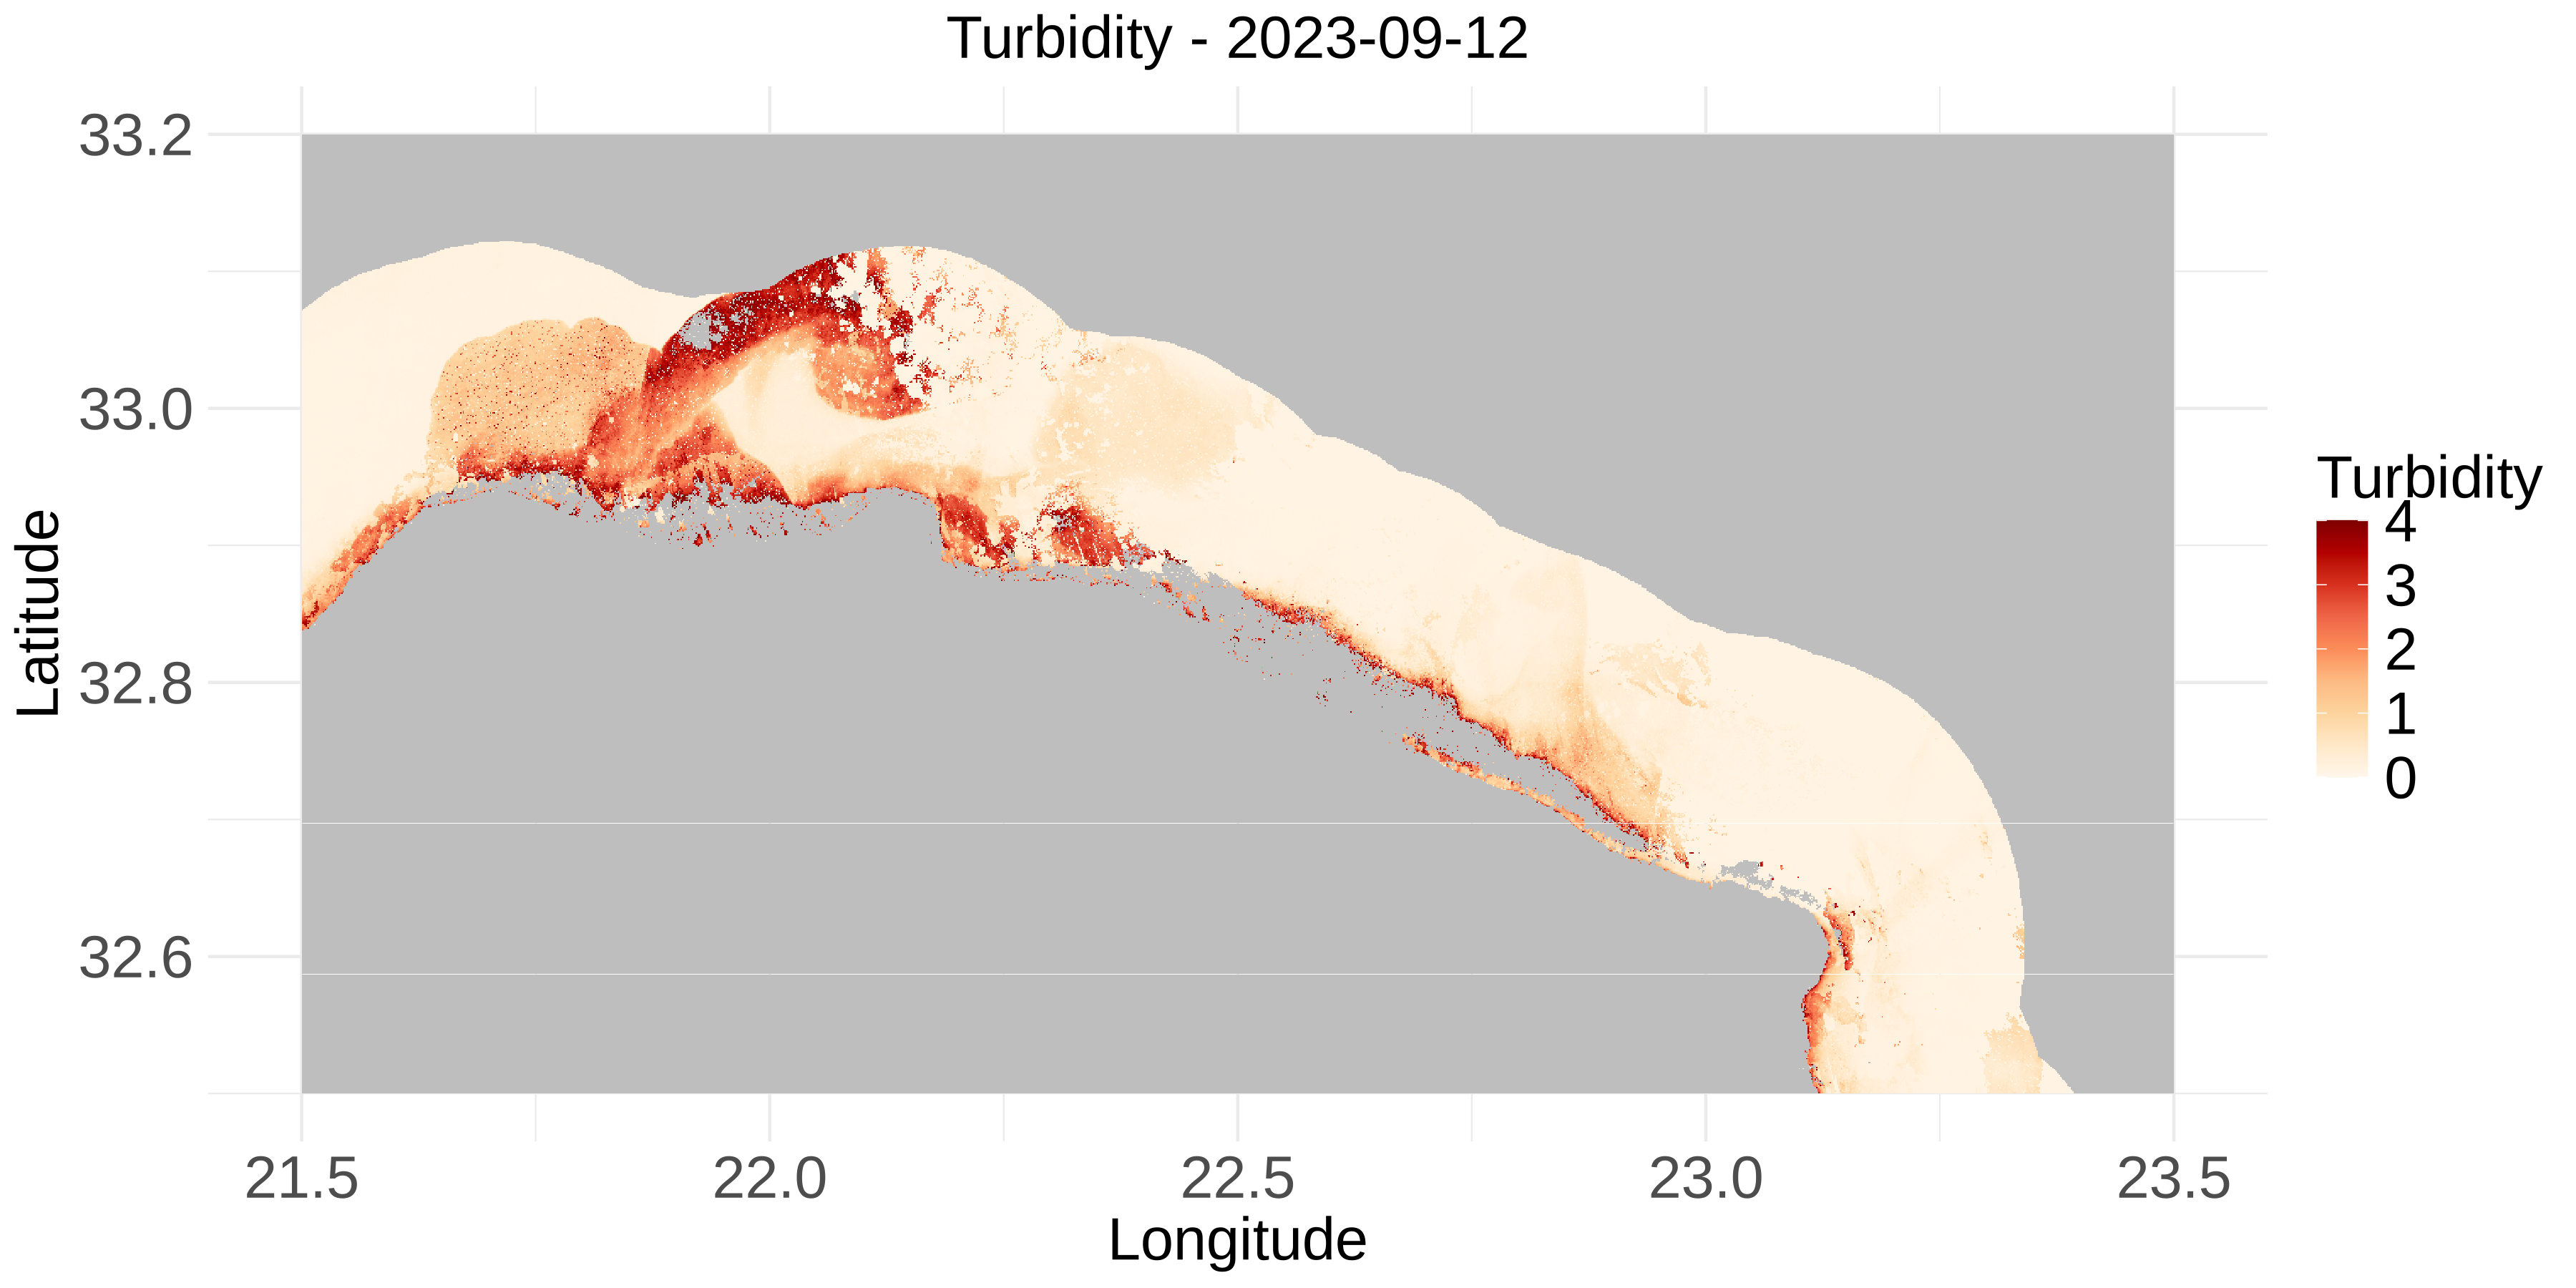

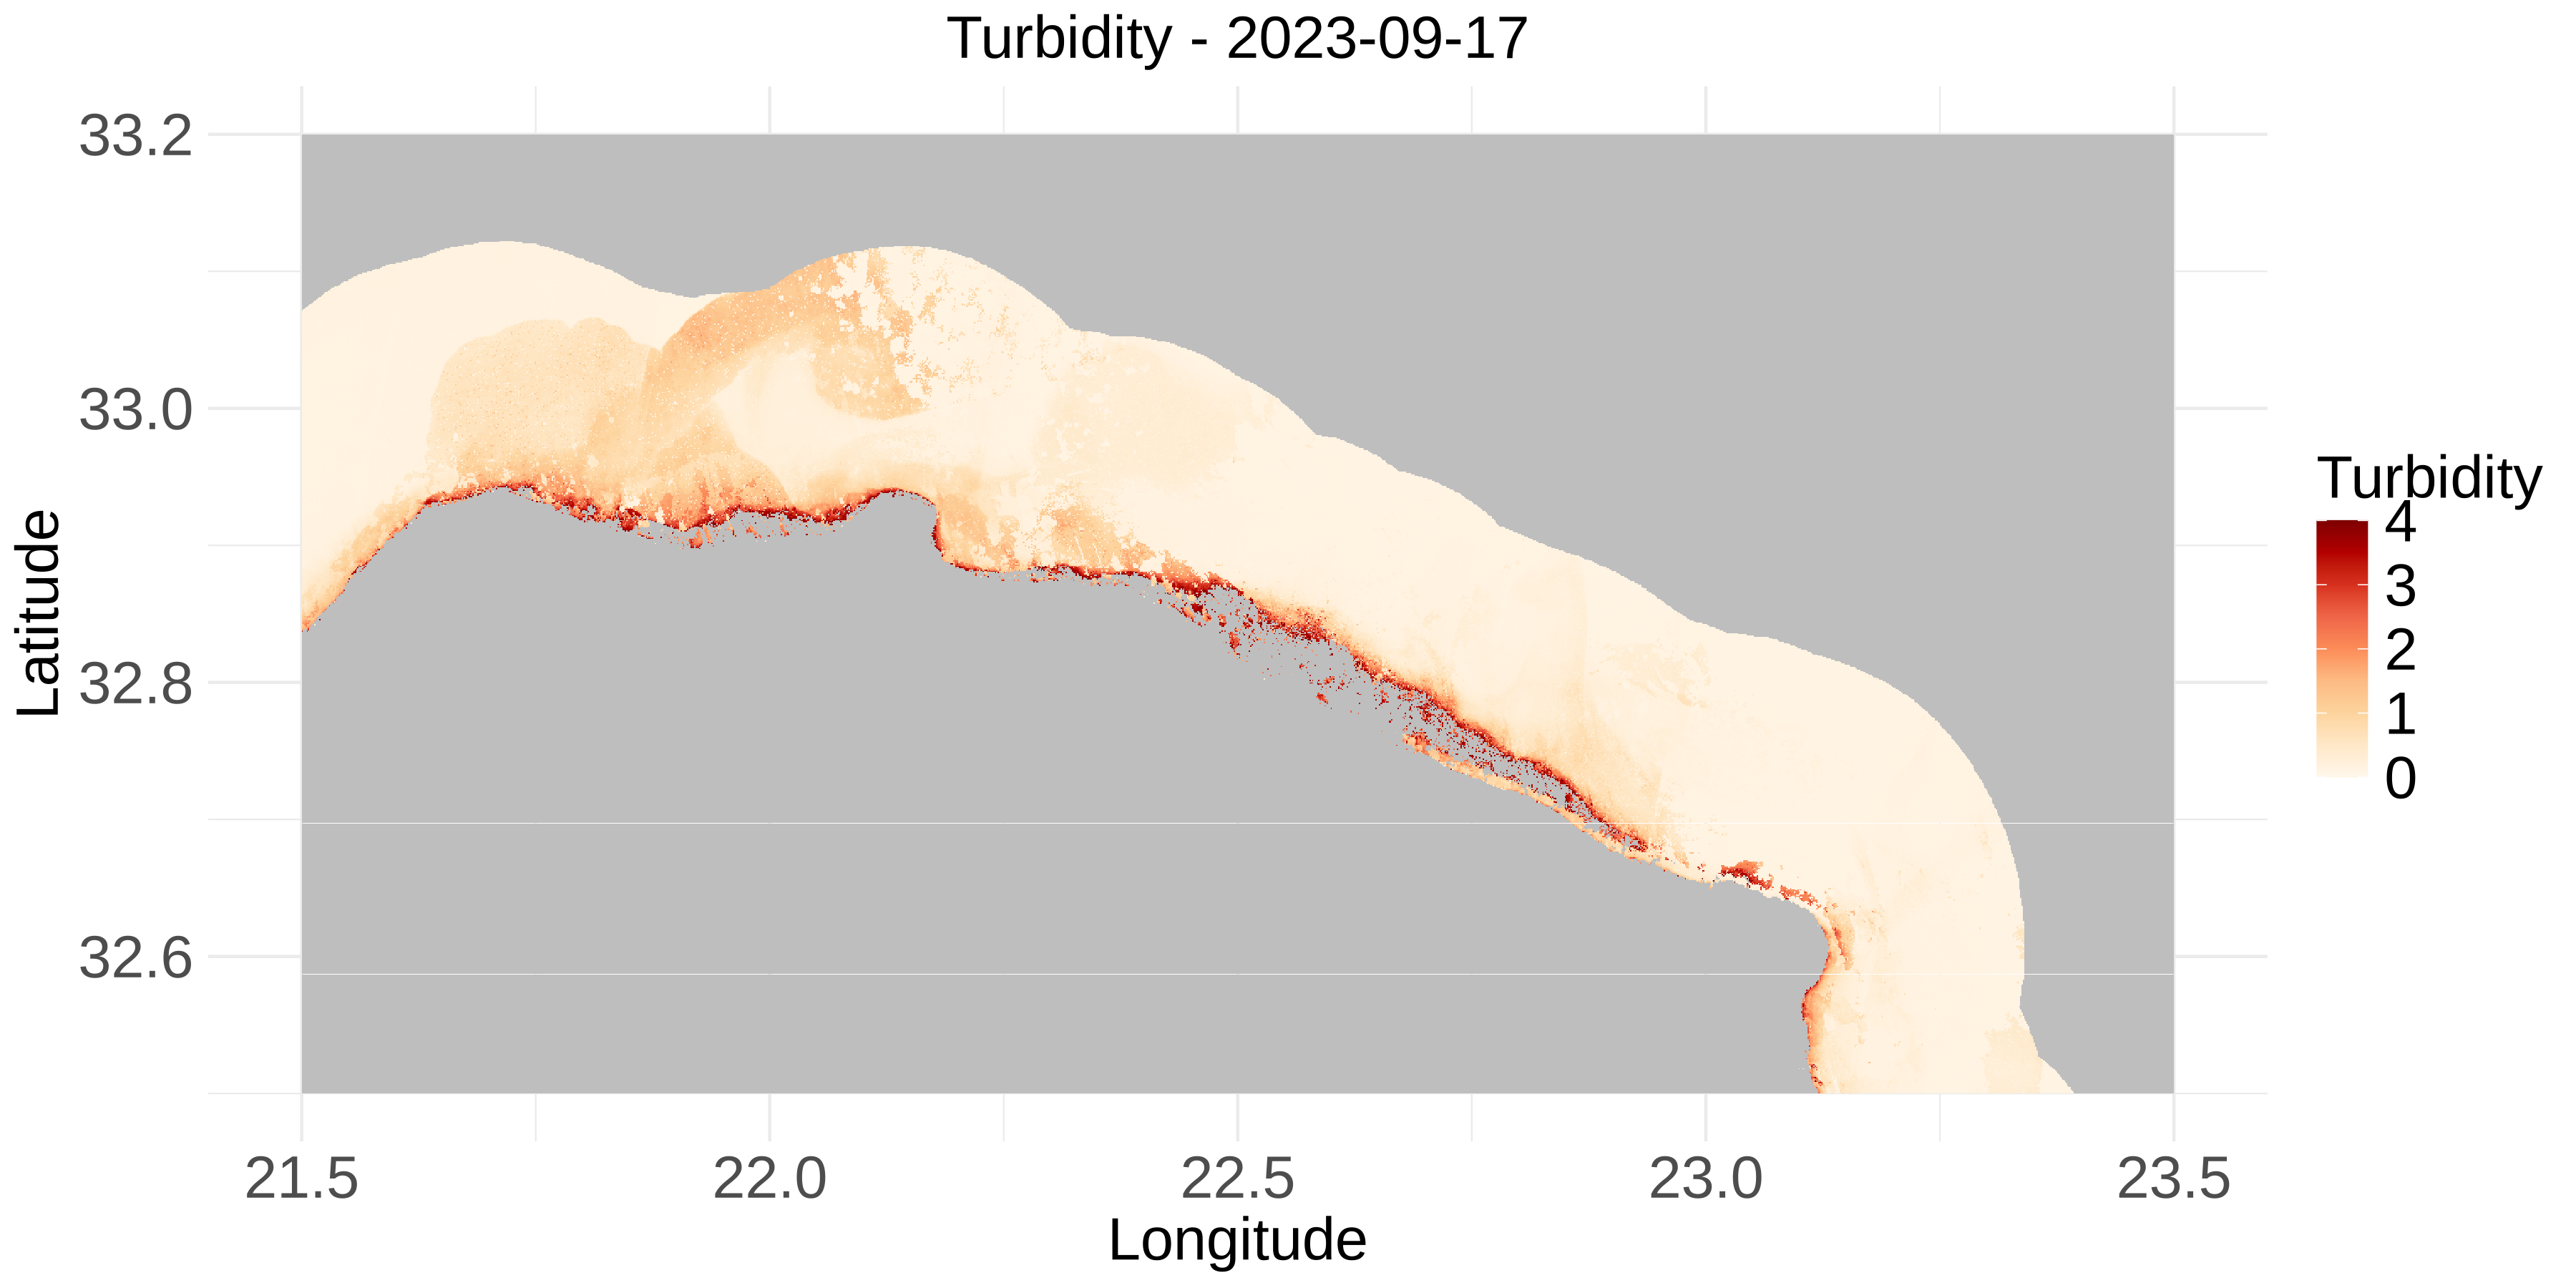

In [21]:
IRdisplay::display_png(file = "./figures/Turbidity_date1.png")

# Display the second image
IRdisplay::display_png(file = "./figures/Turbidity_date2.png")

# Display the third image
IRdisplay::display_png(file = "./figures/Turbidity_date3.png")

And we create a figure with the 3 maps:

To simplify the calculations in this notebook, some cells are commented. They are replaced by simple displays of images of preset plots saved in the "figures" folder.

In [22]:
# options(repr.plot.width = 12, repr.plot.height = 20) 
# p_total=grid.arrange(p1, p2,p3, nrow = 3)
# ggsave("./figures/Turbidity_3_dates.png", plot = p_total ,width =12, height = 20,  dpi = 300)

In [23]:
#IRdisplay::display_png(file = "./figures/Turbidity_date1.png")

We see two distinct zones:
- The first, to the East where we can clearly see the plume with higher turbidity. We see that he was not present before the event. Then it appears during floods then begins to fade a few days later.
- The second, to the West where the plume is less strong than the first, but clearly visible. In addition we see the river which enters the land. It's not exactly the sea but the water from the flood.

The following cells provides the same figures but for suspended matters.

In [24]:
options(repr.plot.width = 15, repr.plot.height = 6) 
p1<-mapping (longitude,latitude,spm[,,7],'Suspended particulate matter',c(0,3),time_values[7])
ggsave("./figures/SPM_date1.png", plot = p1 ,width =12, height = 6,  dpi = 300)
p2<-mapping (longitude,latitude,spm[,,12],'Suspended particulate matter',c(0,3),time_values[12])
ggsave("./figures/SPM_date2.png", plot = p1 ,width =12, height = 6,  dpi = 300)
p3<-mapping (longitude,latitude,spm[,,17],'Suspended particulate matter',c(0,3),time_values[17])
ggsave("./figures/SPM_date3.png", plot = p1 ,width =12, height = 6,  dpi = 300)

# options(repr.plot.width = 12, repr.plot.height = 20) 
# p_total=grid.arrange(p1, p2,p3, nrow = 3)
# ggsave("./figures/SPM_3_dates.png", plot = p_total ,width =12, height = 20,  dpi = 300)

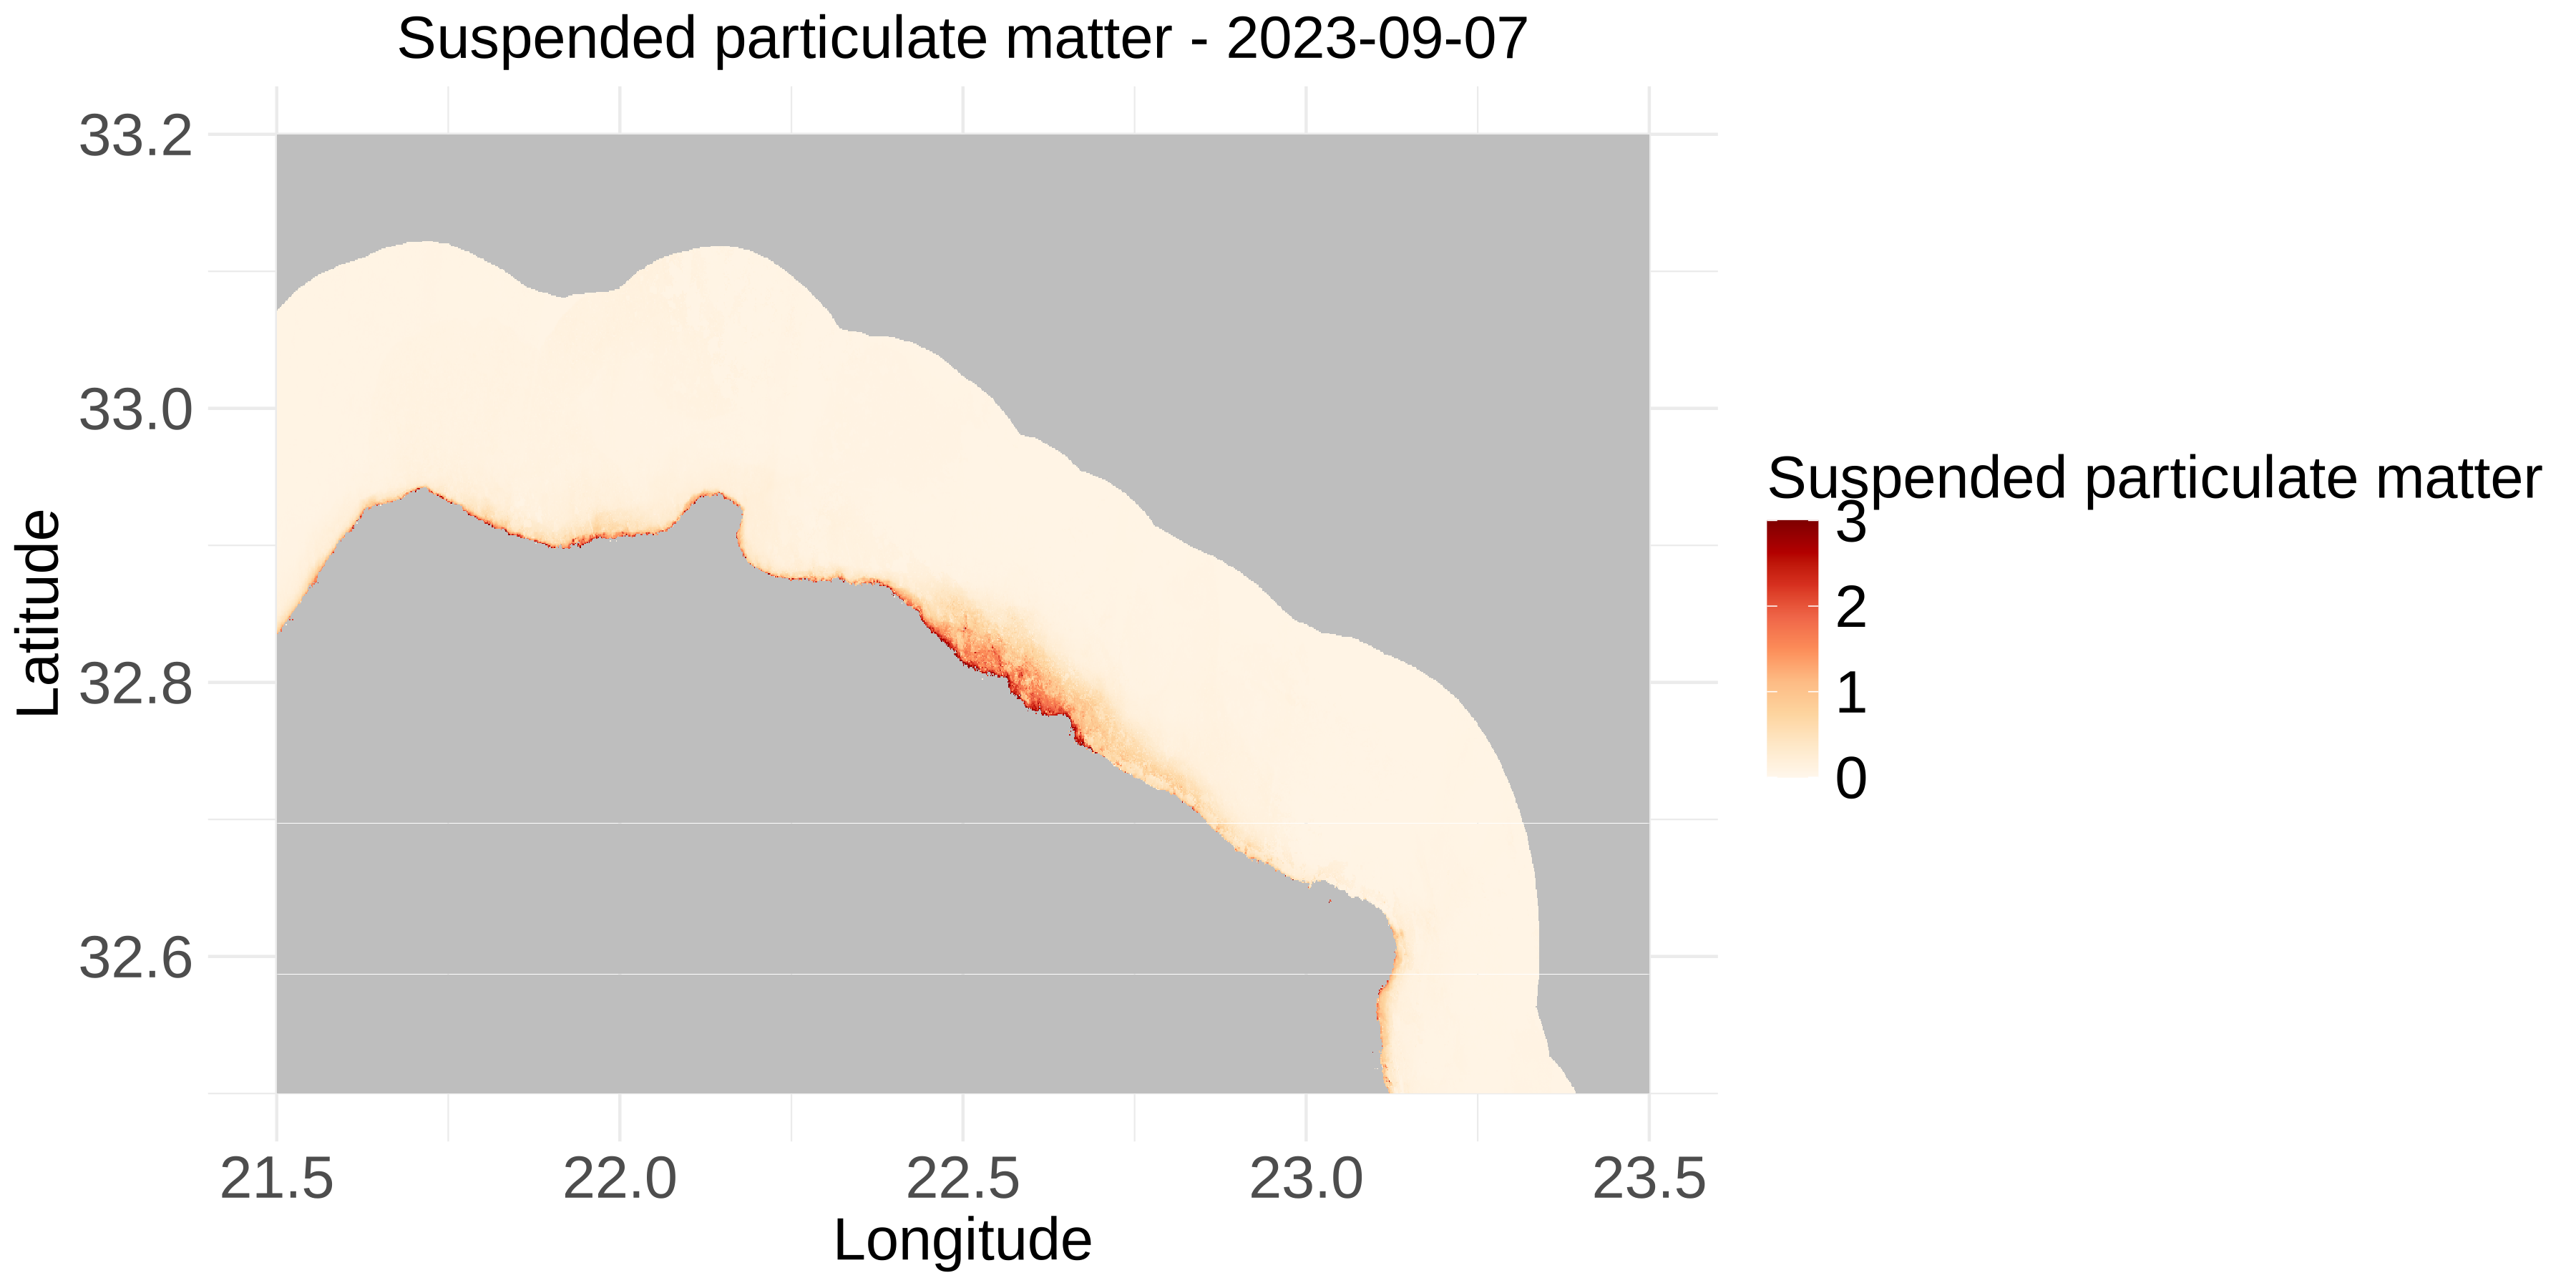

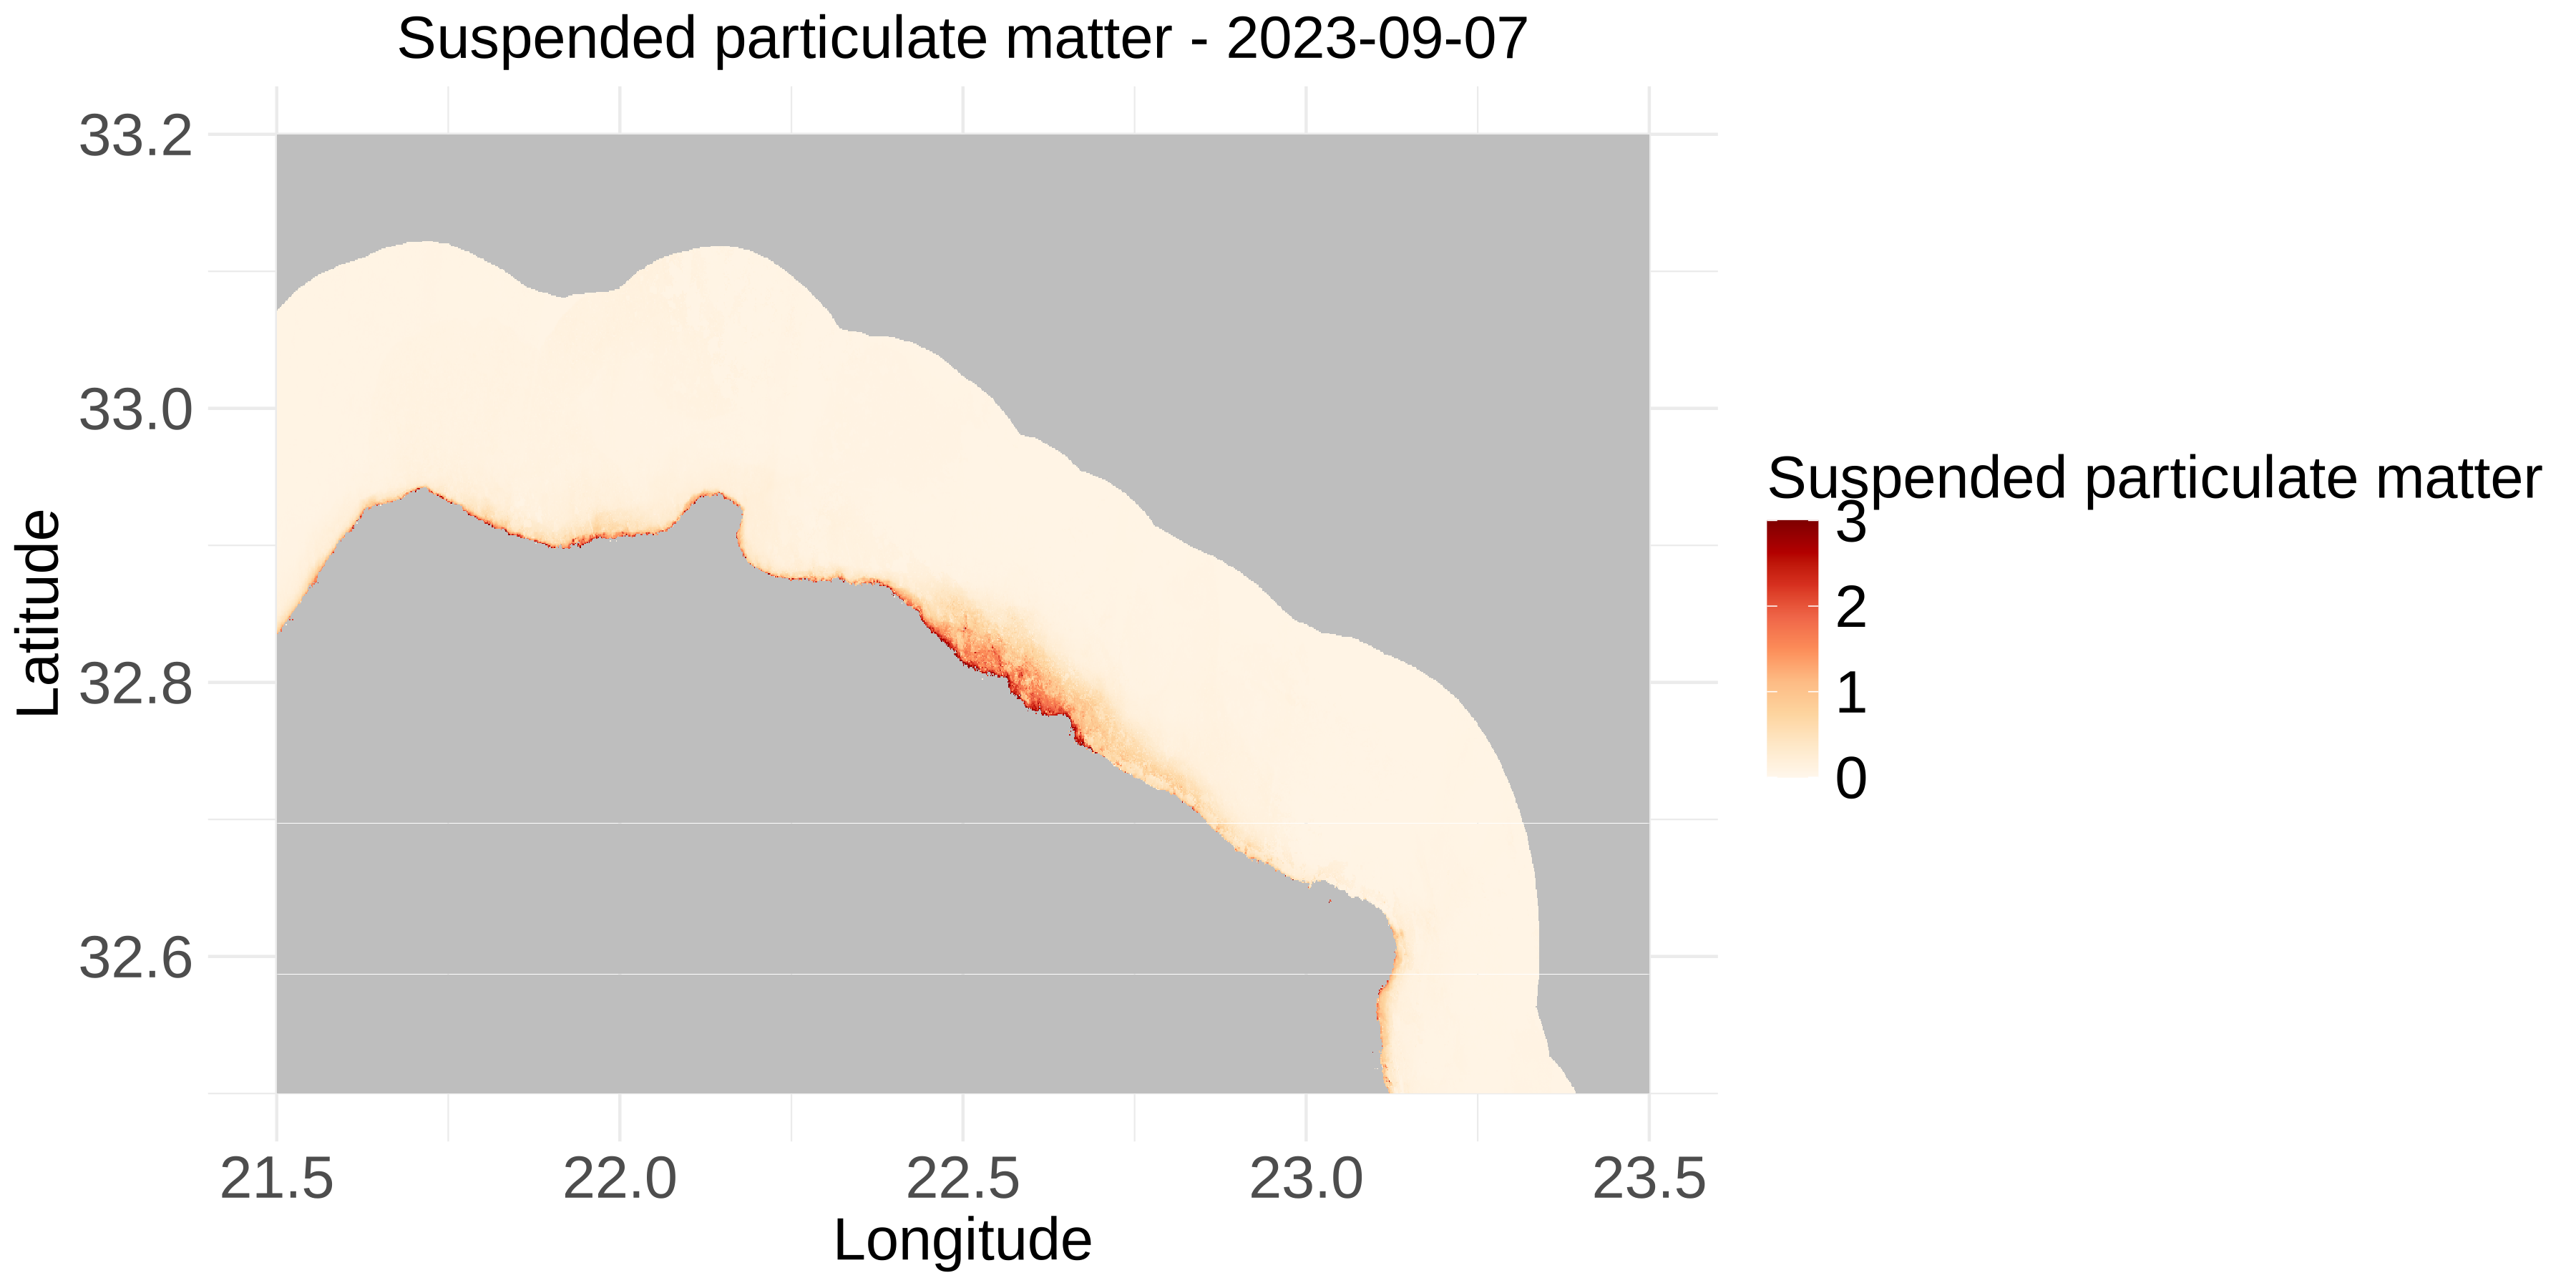

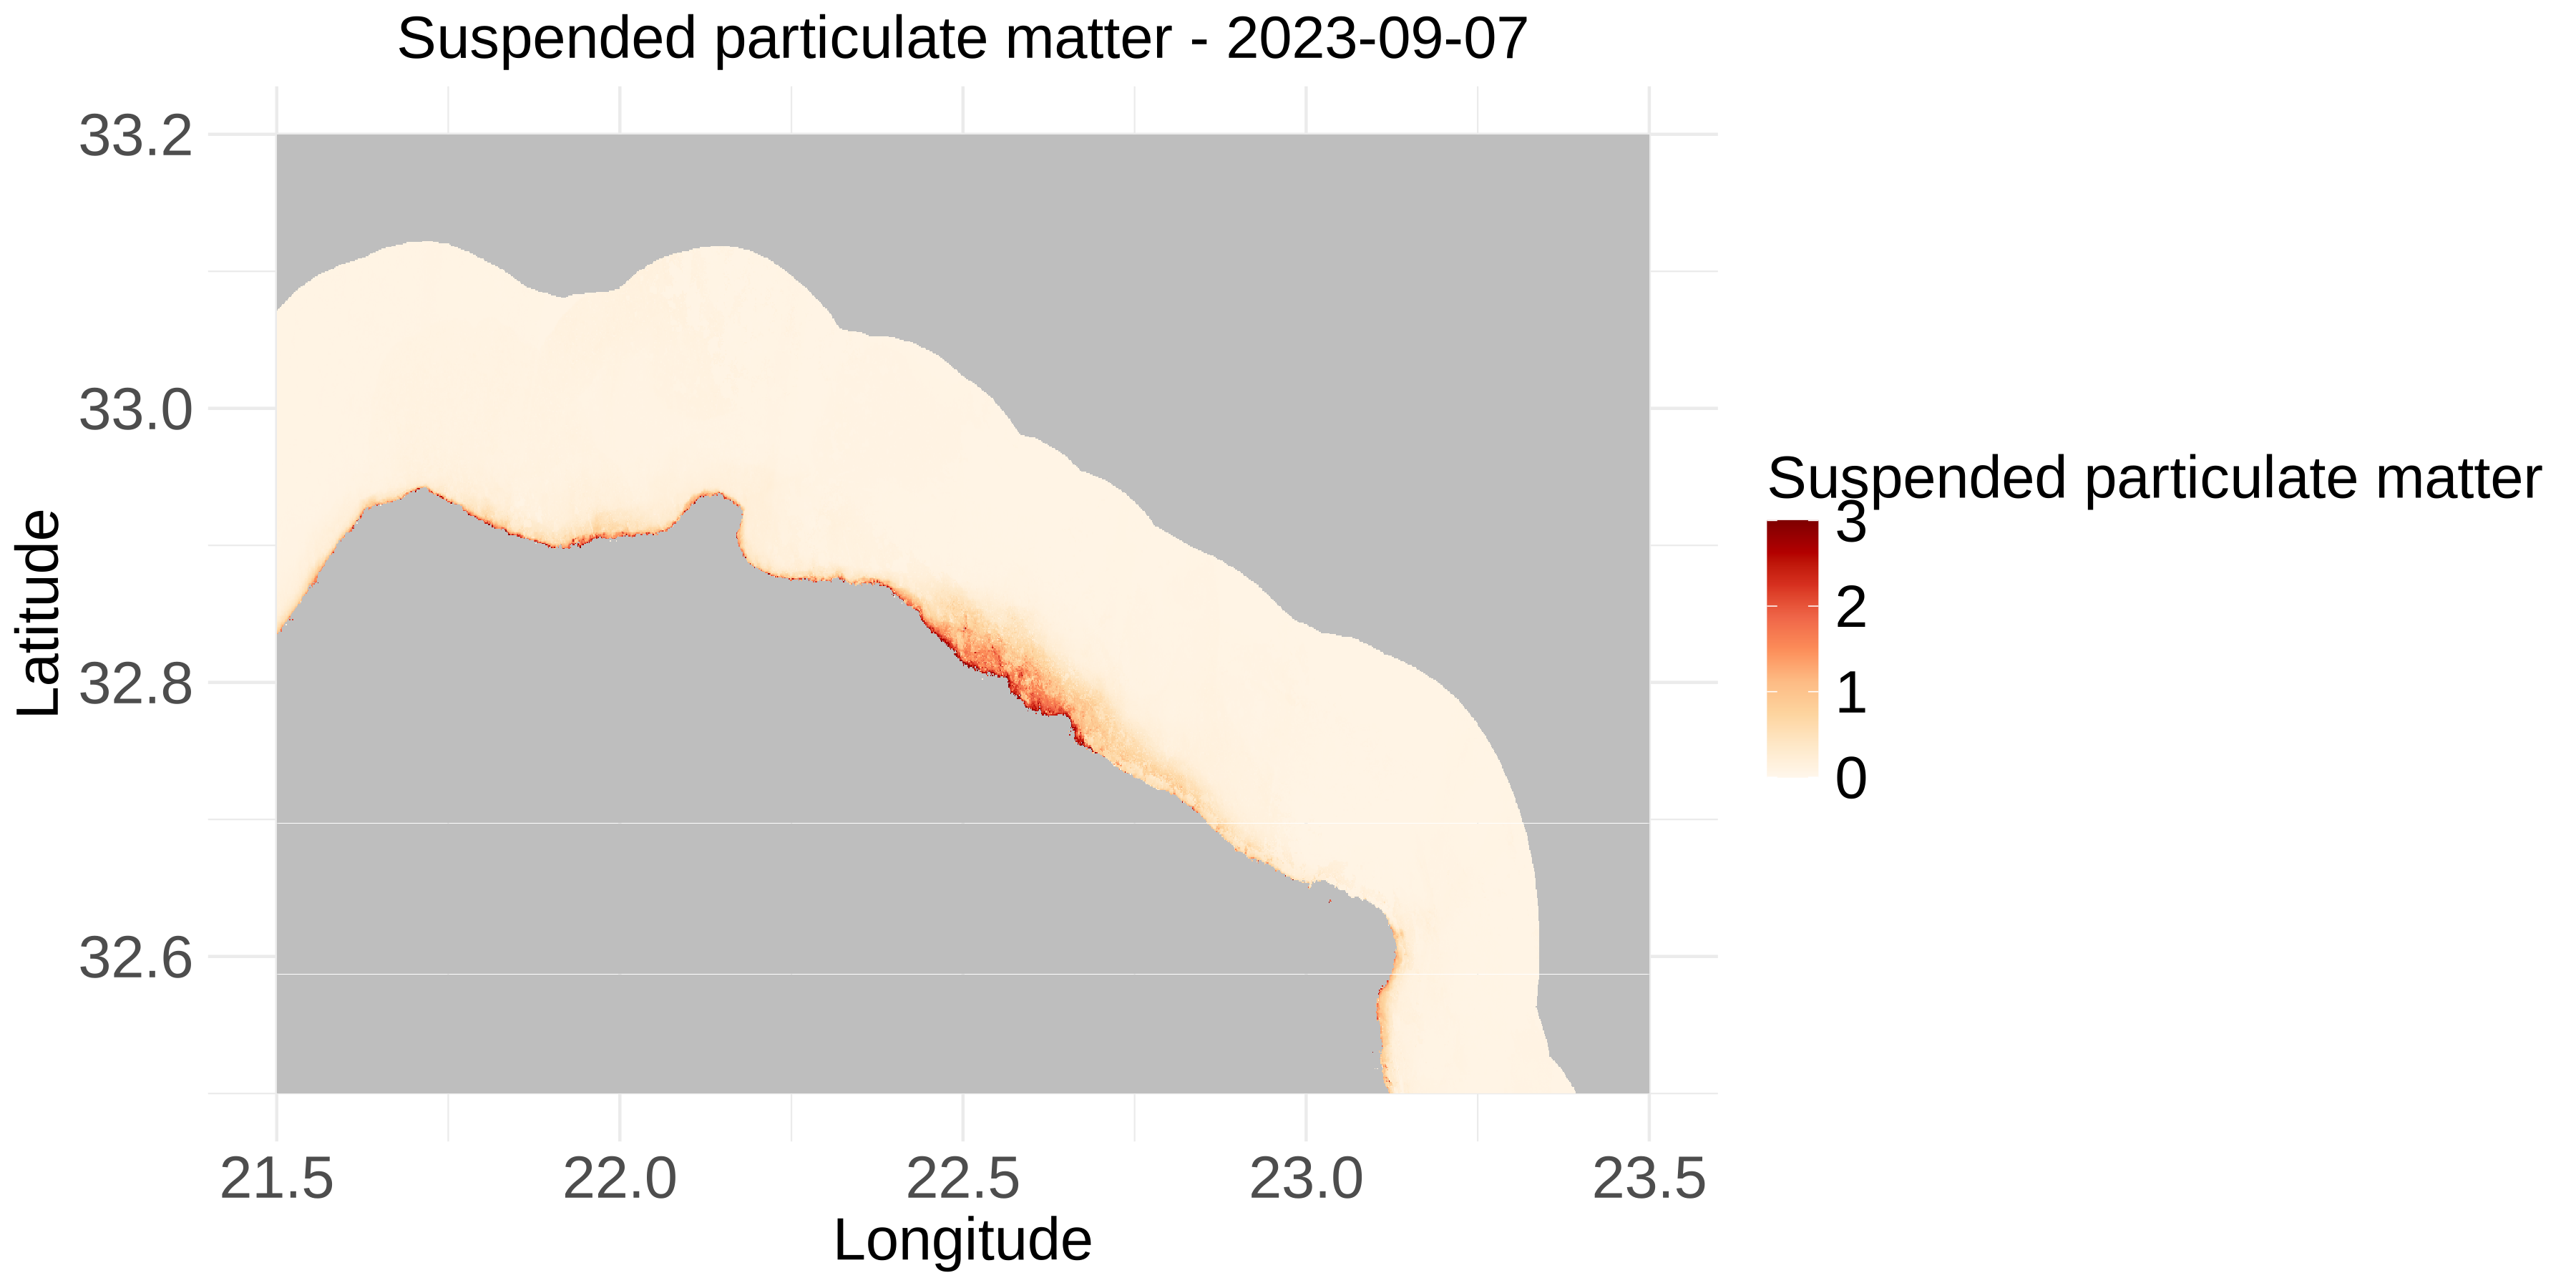

In [25]:
IRdisplay::display_png(file = "./figures/SPM_date1.png")

# Display the second image
IRdisplay::display_png(file = "./figures/SPM_date2.png")

# Display the third image
IRdisplay::display_png(file = "./figures/SPM_date3.png")

We see a great similarity between the turbidity parameter and suspended particles.

# 6. Use of Sentinel 2 data
[Go back to the "Table of contents"](#Table-of-contents)

Sentinel-2 data, provided by the European Union's Copernicus program, are collected by a pair of orbiting satellites (Sentinel-2A and Sentinel-2B). These data offer multispectral images of Earth’s surface with a resolution ranging from 10 to 60 meters, covering 13 spectral bands, including visible and infrared. They enable analysis of land use, agricultural monitoring, forest and aquatic ecosystems, and environmental change detection. With frequent revisits (every 5 days), Sentinel-2 data are particularly valuable for environmental monitoring and management applications.

The dates used are those we worked on previously: September 7, 12 and 17.

In [26]:
# Set path to folder containing Sentinel-2 files
folder <- "data/sentinel2_20230907/"
name<- "T34SFB_20230907T090559_"

In [27]:
# Load each bands
band_red <- raster(paste(folder,name,"B04_10m.jp2", sep=""))   # Band 4 - Red
band_green <- raster(paste(folder,name,"B03_10m.jp2", sep=""))   # Band 3 - Green
band_blue <- raster(paste(folder,name,"B02_10m.jp2", sep=""))    # Band 2 - Blue

In [28]:
# for improving the visualization of the image 
band_red_stretch <- stretch(band_red, minq = 0.05, maxq = 0.8)
band_green_stretch <- stretch(band_green, minq = 0.05, maxq = 0.8)
band_blue_stretch <- stretch(band_blue, minq = 0.05, maxq = 0.8)

In [29]:
# Stack the bands to create a raster stack
image_rgb <- stack(band_red_stretch, band_green_stretch, band_blue_stretch)

png 
  2

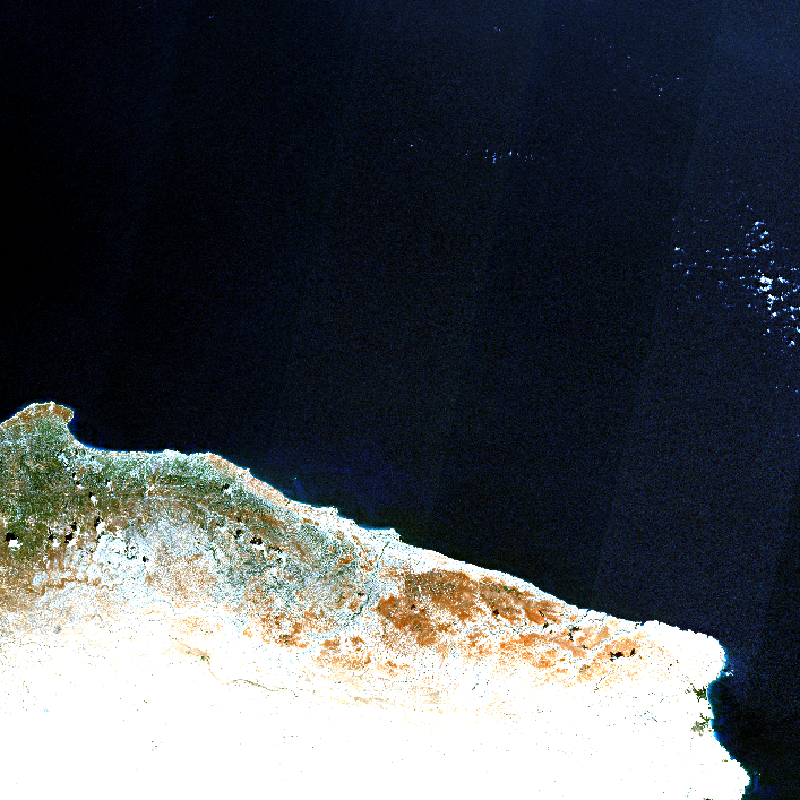

In [30]:
# View image in real color
#options(repr.plot.width = 15, repr.plot.height = 6) 

output_file <- "./figures/sentinel2_20230907.png"

# Open a PNG graphics device
png(filename = output_file, width = 800, height = 800)  # Adjust width and height as needed
# Create the plot
plotRGB(image_rgb, r = 1, g = 2, b = 3)
# Close the graphics device
dev.off()
IRdisplay::display_png(file = "./figures/sentinel2_20230907.png")
rm(list = ls())


Here you see a visualization with the real colors from the red, blue and green bands. 
We will do the same manipulation for the other 2 dates to follow the impact of the flood.

png 
  2

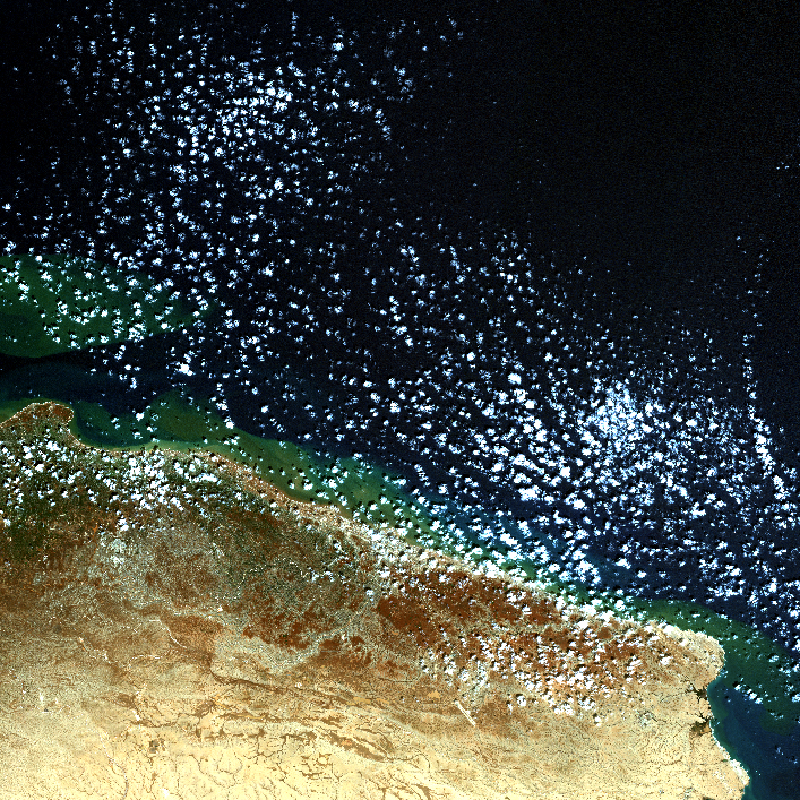

In [31]:
###################### For September 12: #######################

# Set path to folder containing Sentinel-2 files
folder <- "data/sentinel2_20230912/"
name<- "T34SFB_20230912T090601_"

# Load each bands
band_red <- raster(paste(folder,name,"B04_10m.jp2", sep=""))   # Band 4 - Red
band_green <- raster(paste(folder,name,"B03_10m.jp2", sep=""))   # Band 3 - Green
band_blue <- raster(paste(folder,name,"B02_10m.jp2", sep=""))    # Band 2 - Blue

# for improving the visualization of the image 
band_red_stretch <- stretch(band_red, minq = 0.05, maxq = 0.95)
band_green_stretch <- stretch(band_green, minq = 0.05, maxq = 0.95)
band_blue_stretch <- stretch(band_blue, minq = 0.05, maxq = 0.95)

# Stack the bands to create a raster stack
image_rgb <- stack(band_red_stretch, band_green_stretch, band_blue_stretch)

# View image in real color

output_file <- "./figures/sentinel2_20230912.png"

# Open a PNG graphics device
png(filename = output_file, width = 800, height = 800)  # Adjust width and height as needed
# Create the plot
plotRGB(image_rgb, r = 1, g = 2, b = 3)
# Close the graphics device
dev.off()
IRdisplay::display_png(file = "./figures/sentinel2_20230912.png")
rm(list = ls())

png 
  2

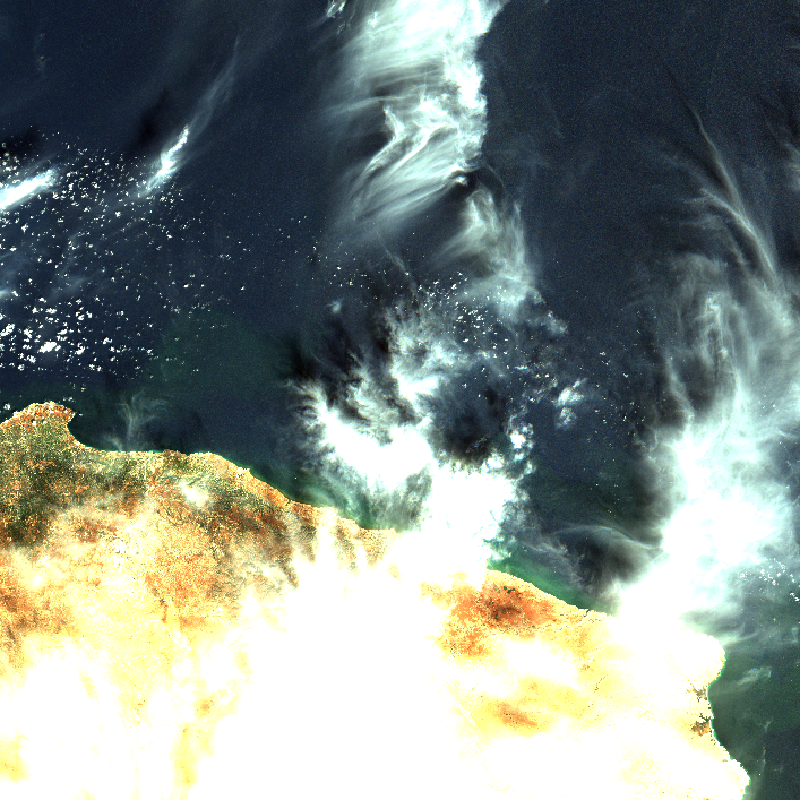

In [32]:
###################### For September 17: #######################
# Set path to folder containing Sentinel-2 files
folder <- "data/sentinel2_20230917/"
name<- "T34SFB_20230917T090629_"

# Load each bands
band_red <- raster(paste(folder,name,"B04_10m.jp2", sep=""))   # Band 4 - Red
band_green <- raster(paste(folder,name,"B03_10m.jp2", sep=""))   # Band 3 - Green
band_blue <- raster(paste(folder,name,"B02_10m.jp2", sep=""))    # Band 2 - Blue

# for improving the visualization of the image 
band_red_stretch <- stretch(band_red, minq = 0, maxq = 0.7)
band_green_stretch <- stretch(band_green, minq = 0, maxq = 0.7)
band_blue_stretch <- stretch(band_blue, minq = 0, maxq = 0.8)

# Stack the bands to create a raster stack
image_rgb <- stack(band_red_stretch, band_green_stretch, band_blue_stretch)

# View image in real color

output_file <- "./figures/sentinel2_20230917.png"

# Open a PNG graphics device
png(filename = output_file, width = 800, height = 800)  # Adjust width and height as needed
# Create the plot
plotRGB(image_rgb, r = 1, g = 2, b = 3)
# Close the graphics device
dev.off()
IRdisplay::display_png(file = "./figures/sentinel2_20230917.png")
rm(list = ls())

Sentinel-2 satellite imagery has provided valuable insights for analyzing and understanding the spread of the sediment plume in the Mediterranean Sea following the devastating floods in Derna. With their high spatial resolution and spectral bands covering both visible and infrared wavelengths, these images allow for the detection of turbidity variations in the water, revealing areas impacted by the massive influx of sediments and debris. These data contribute to assessing the environmental impact, particularly on marine and coastal ecosystems, by observing the dispersion of suspended materials. They are essential for post-crisis management, offering visual and quantitative foundations for researchers and authorities to monitor the plume's progression, develop ecological response strategies, and prevent similar future impacts.

# 7. Conclusion
[Go back to the "Table of contents"](#Table-of-contents)

<div class="alert alert-block alert-success">
<b>Congratulations!</b> You have successfully completed the introductory-intermediate tutorial on using WEKEO products to evaluate the sediment plume due to flooding near Derna. Throughout this tutorial, we have explained the basic tools necessary to access and visualize observation and satellite data, generate different types of plots.
<br><br>

In this tutorial, you acquired all the information you need to:
 


* Access NetCDF datasets and Multispectral images.

* Navigate through the different variables, dimensions, and attributes of a NetCDF file.

* Plot maps of any variable.

* Modify maps to include additional information.

 
We sincerely hope that you have enjoyed the tutorial and found useful information in it. Please keep in mind that the tutorial has a progressive difficulty, moving quickly from basic elements to intermediate levels. Our intention is for all users to find useful information tailored to their level.
 
We understand that, for a user without prior knowledge, fully understanding all the procedures in the tutorial may be a challenge that requires some effort. However, we encourage everyone to take on the challenge as this is just the beginning of a journey towards a new understanding of the ocean and its ecosystems.
 
</div>

 